In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install  mlforecast
from mlforecast.utils import generate_daily_series
!pip install pyarrow
!pip install statsforecast
from statsforecast import StatsForecast
#importing for visualization process
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from math import sqrt
from sklearn.metrics import mean_squared_error
#import fbprophet
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 844.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 kB 4.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 4.2 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.5-py3-none-any.whl size=157611 sha256=f740a3674538b65c86f4475acfb718f49bb20a77b10093a310bad457afaf0ded
  Stored in directory: /root/.cache/pip/wheels/5d/dc/65/0a25b69011abd4e7a198ad0e4aa5399ae919082f6959deba31
Successfully built fugue-sql-antlr
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3

/opt/conda/lib/python3.7/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


![forecast](https://thumbs.dreamstime.com/z/man-holding-documents-demand-forecasting-name-108646291.jpg)

In [2]:
#reading ing_x data
ing_x=pd.read_csv('/kaggle/input/ing-x-data/ing_x.csv')

In [3]:
ing_x

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
0,2016-02-29 09:00:00,fid_33785,ing_x,11248.1380,12.8,0.0,8.9,1022.0,0.0,76.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1857.260
1,2016-02-29 09:00:00,fid_32954,ing_x,2508.3810,12.8,0.0,8.9,1022.0,0.0,76.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,590.945
2,2016-02-29 09:00:00,fid_43573,ing_x,9232.7000,12.8,0.0,8.9,1022.0,0.0,76.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1224.100
3,2016-02-29 09:00:00,fid_48575,ing_x,8012.8840,12.8,0.0,8.9,1022.0,0.0,76.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1435.150
4,2016-02-29 09:00:00,fid_109906,ing_x,7799.8570,12.8,0.0,8.9,1022.0,0.0,76.50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,422.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234051,2016-04-28 12:00:00,fid_74945,ing_x,7561.3750,0.5,340.0,-7.1,1021.0,3.6,59.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000
4234052,2016-12-17 06:00:00,fid_112848,ing_x,6320.1910,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000
4234053,2016-12-17 06:00:00,fid_58769,ing_x,8659.1170,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000
4234054,2016-12-17 06:00:00,fid_117010,ing_x,11857.3955,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000


In [4]:
#converting date to datetime format for predictions
ing_x['date'] = pd.to_datetime(ing_x['date'])

In [5]:
#setting index according to the date and sorting the index
ing_x = ing_x.set_index(ing_x['date'])
ing_x = ing_x.sort_index()

In [6]:
# create train test partition
train = ing_x['2016-01-01 00:00:00':'2016-11-30 00:00:00']
test  = ing_x['2016-12-01':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (3851585, 43)
Test Dataset: (370892, 43)


In [7]:
train

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2016-01-01,fid_54620,ing_x,22066.1350,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,782.3540
2016-01-01,2016-01-01,fid_61038,ing_x,9124.1890,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2016-01-01,2016-01-01,fid_55290,ing_x,11307.5960,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6652
2016-01-01,2016-01-01,fid_71811,ing_x,12033.9110,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2016-01-01,2016-01-01,fid_74943,ing_x,8842.6930,-8.3,250.0,-12.2,1023.5,4.1,72.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.6608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30,2016-11-30,fid_91097,ing_x,10370.1110,20.0,350.0,5.0,1005.0,1.5,37.34,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,83.1383
2016-11-30,2016-11-30,fid_47712,ing_x,20904.4770,20.0,350.0,5.0,1005.0,1.5,37.34,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,152.6310
2016-11-30,2016-11-30,fid_95045,ing_x,22263.0900,20.0,350.0,5.0,1005.0,1.5,37.34,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,283.4930


In [8]:
#resampling train data according to the hours and interpolating with linear method
train = train.resample('H').mean()
train = train.interpolate(method='linear')
#resampling test data according to the hours and interpolating with linear method
test = test.resample('H').mean()
test= test.interpolate(method='linear')

By performing these operations on the datasets, we are preparing them for further analysis, such as time series forecasting or machine learning. Resampling and interpolation can help to reduce noise and make the data more consistent, which can improve the accuracy of the analysis.

**yield_Linear_Interpolation**

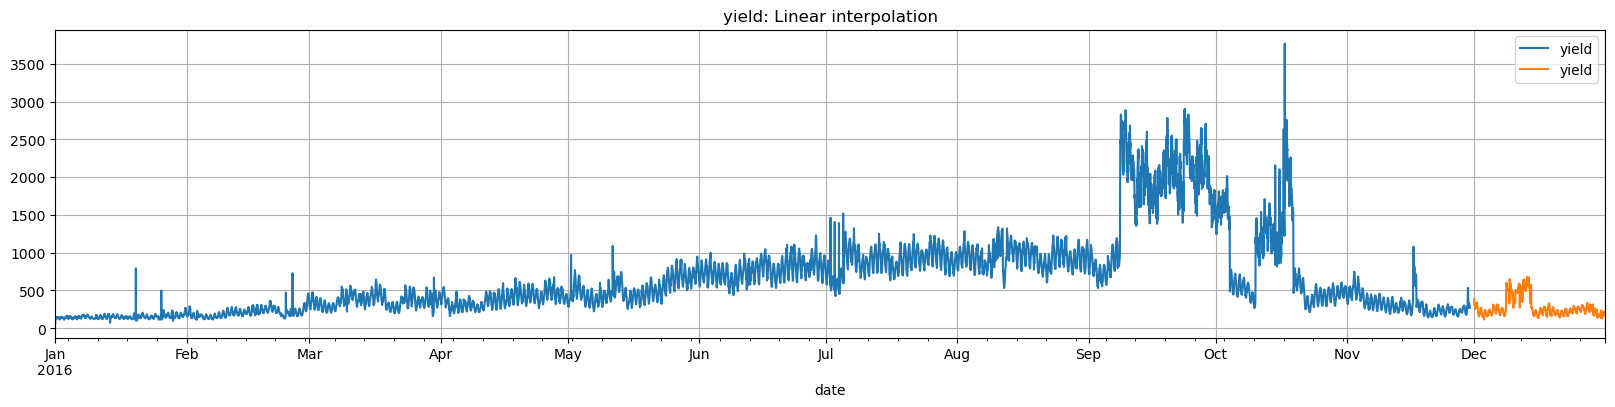

In [9]:
train = train.assign(yield_Linear_Interpolation=train['yield'].interpolate(method='linear'))
train[['yield']].plot(figsize=(20, 4))
test["yield"].plot()
plt.grid()
plt.legend(loc='best')
plt.title('yield: Linear interpolation')
plt.show(block=False)

In [10]:
#The rolling() method in Pandas is used to perform a rolling computation over a specified window size
movingaverage=train.rolling(window=12).mean()
movingstd=train.rolling(window=12).std()

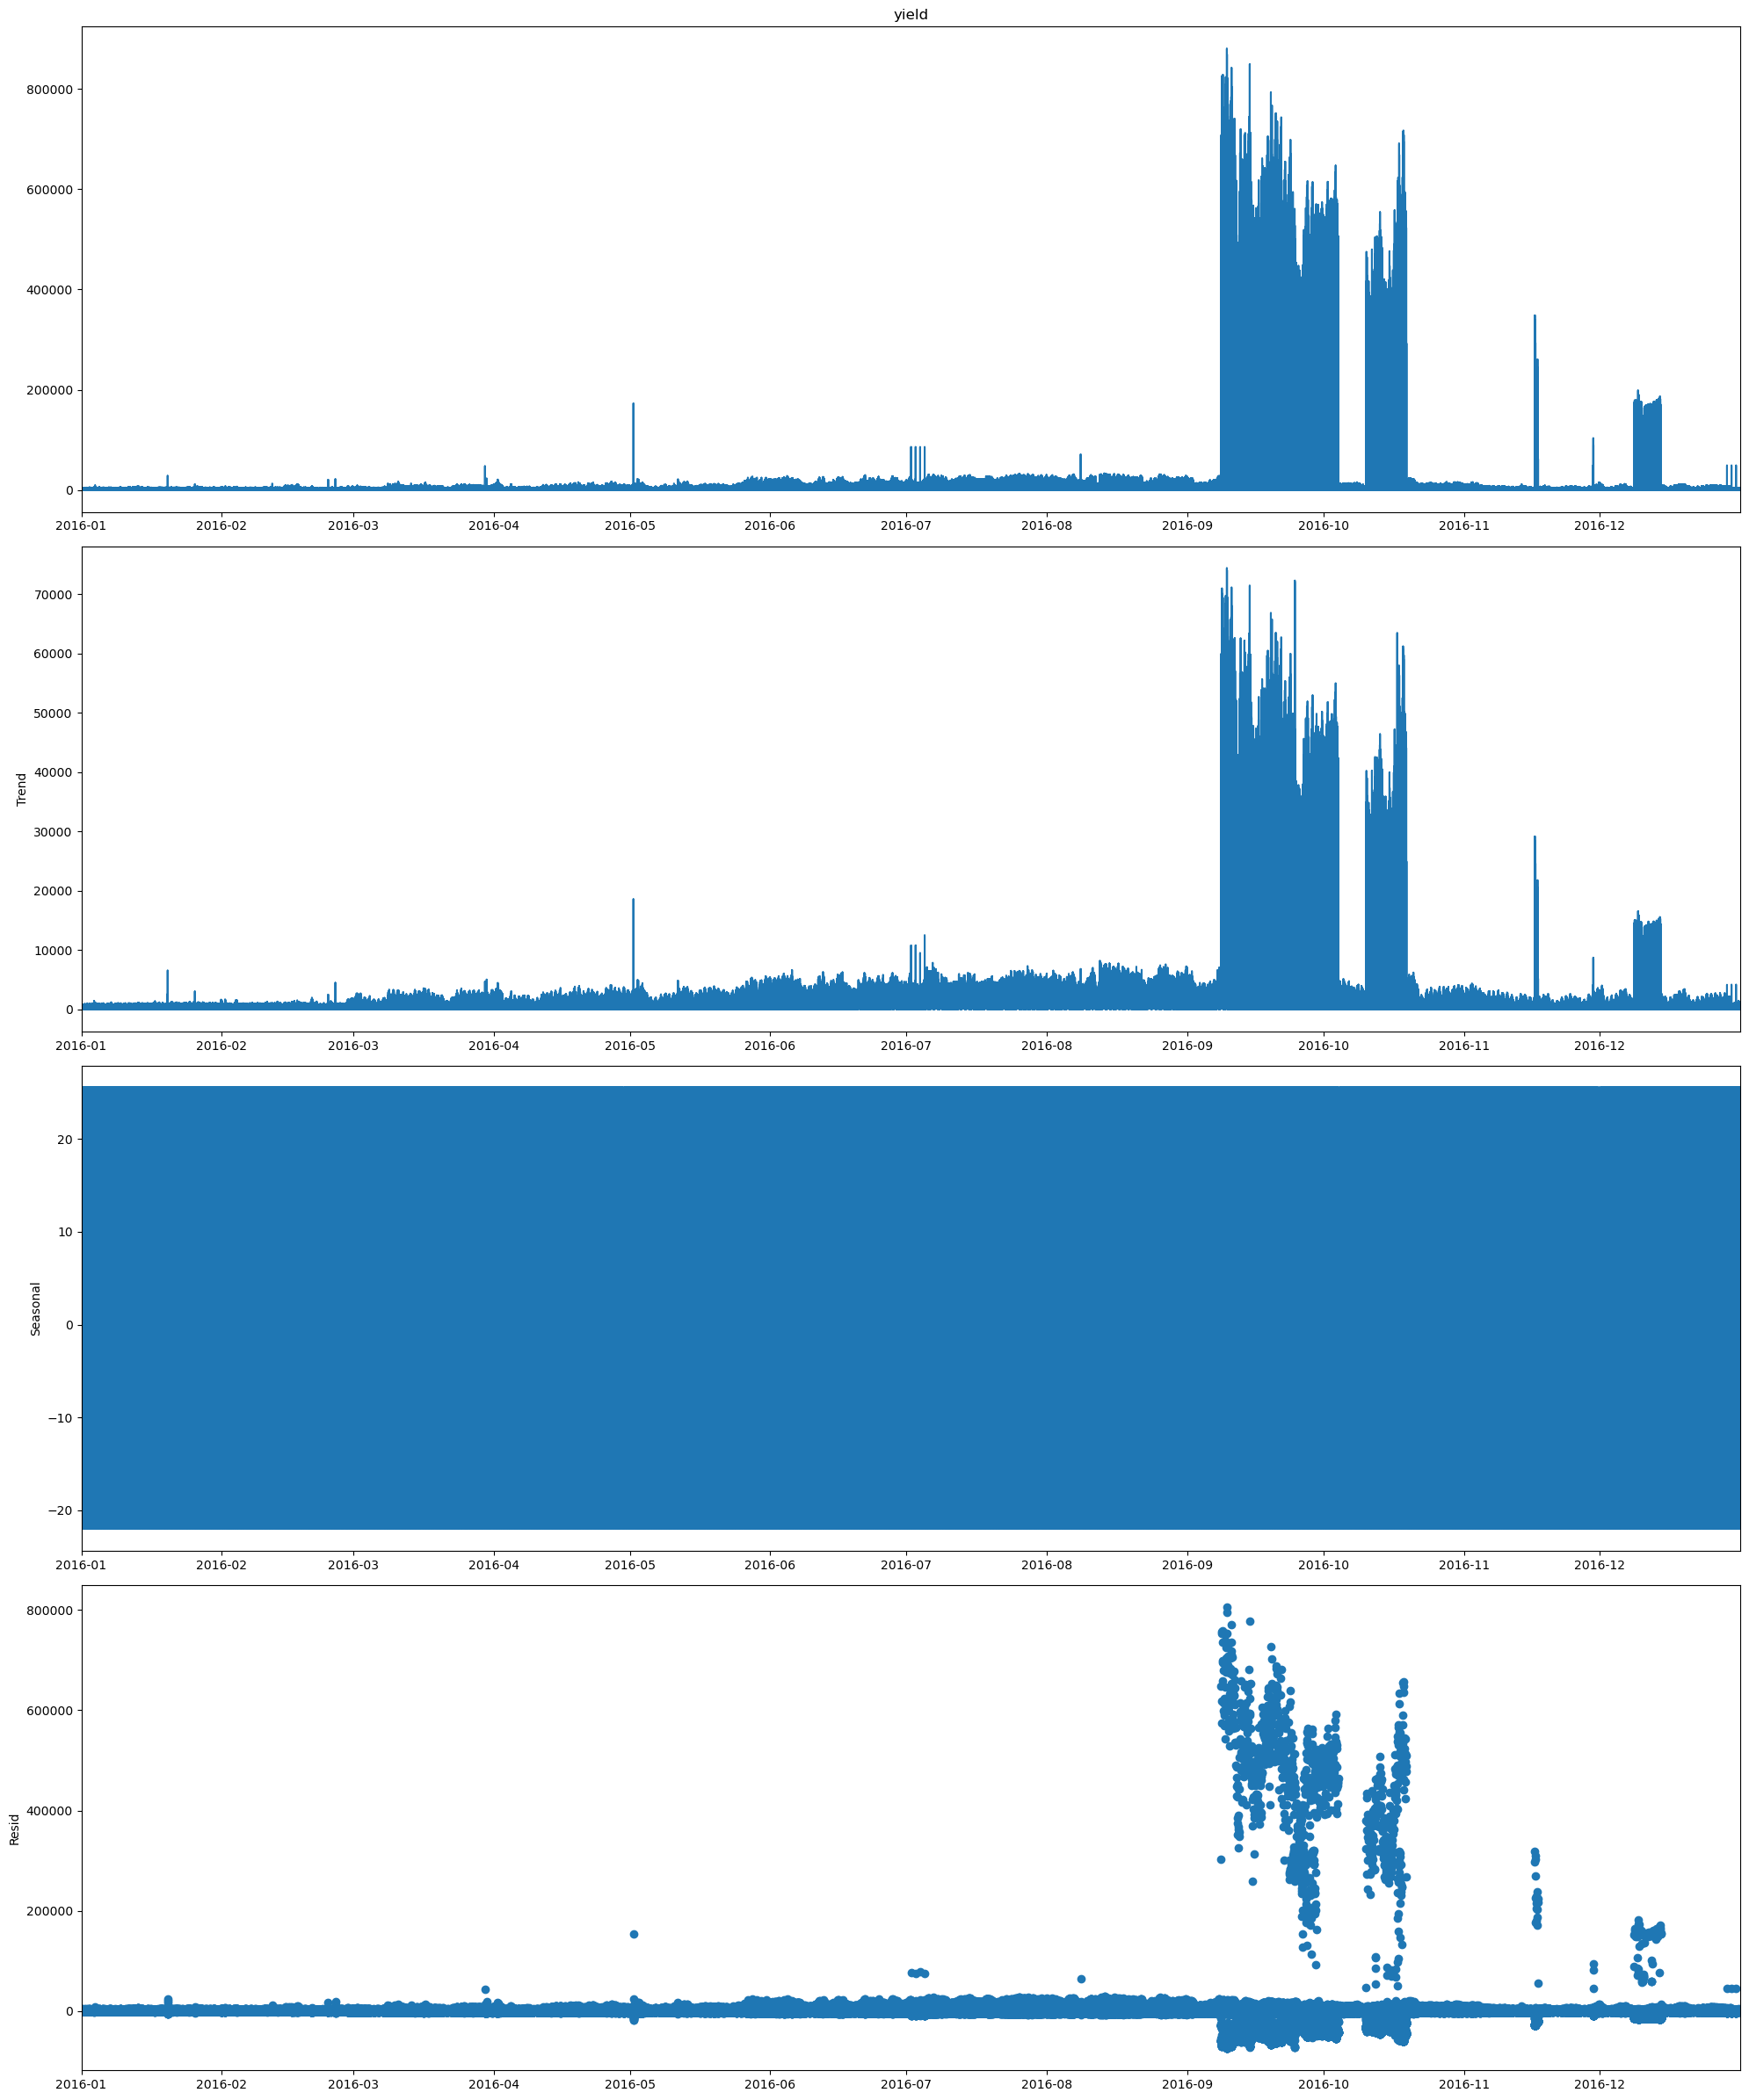

In [11]:
# plotting seasonal decompose of train data
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(ing_x['yield'], model='additive',period =12) # additive seasonal index
fig = decomposition.plot()
plt.show()

Tts following a trend as we can see above and at a particular time the yield has been increased on october to november region.

**PERFORMING y_hat_avg_moving FOR TEST DATA**

Text(0.5, 1.0, 'Moving Average Forecast')

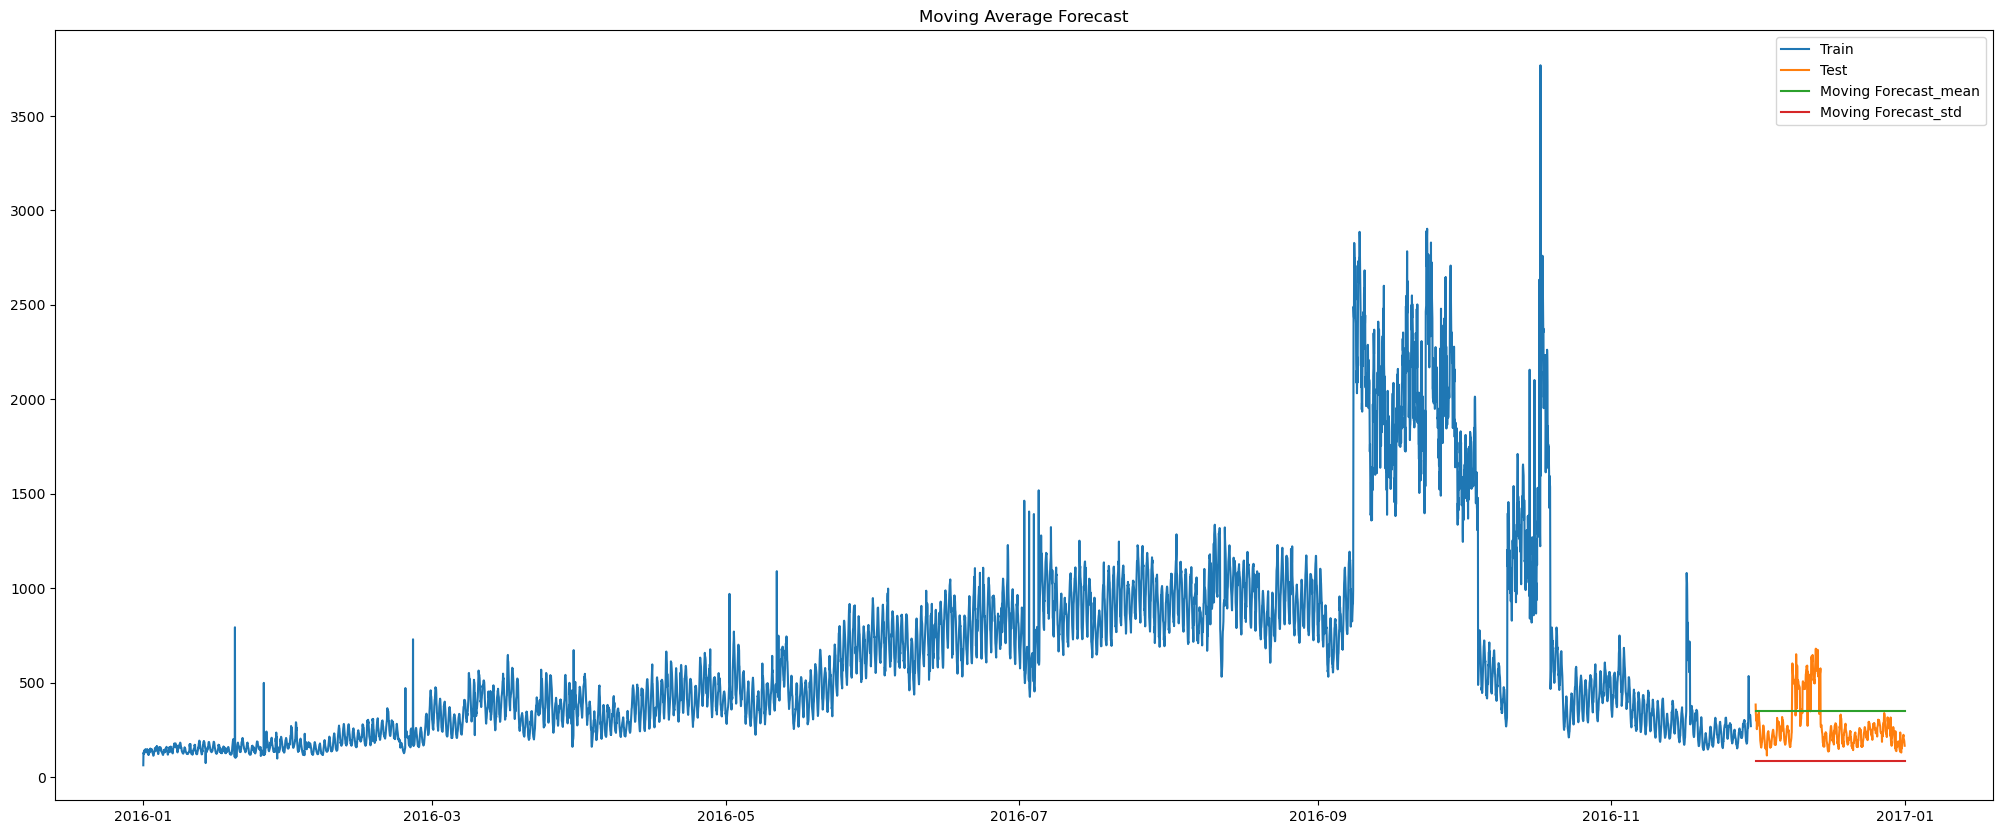

In [12]:
y_hat_avg_moving = test.copy()
y_hat_avg_moving['moving_avg_forcast_mean'] = train['yield'].rolling(window=12).mean().iloc[-1]
y_hat_avg_moving['moving_avg_forcast_std'] = train['yield'].rolling(window=12).std().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg_moving['moving_avg_forcast_mean'], label='Moving Forecast_mean')
plt.plot(y_hat_avg_moving['moving_avg_forcast_std'], label='Moving Forecast_std')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [13]:
y_hat_avg_moving

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,farming_company_Del Monte Foods,farming_company_Dole Food Company,farming_company_Foster Farms,...,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield,moving_avg_forcast_mean,moving_avg_forcast_std
date,,,,,,,,,,,,,,,,,,,,,
2016-12-01 00:00:00,11525.048288,11.913889,165.634921,3.166468,1009.257937,2.806349,66.579980,0.045635,0.111111,0.027778,...,0.001984,0.0,0.0,0.047619,0.190476,0.007937,0.0,384.177296,350.823928,86.212168
2016-12-01 01:00:00,11525.048288,11.201190,166.111111,3.206944,1008.830357,3.493849,66.544782,0.045635,0.111111,0.027778,...,0.001984,0.0,0.0,0.047619,0.190476,0.007937,0.0,336.406088,350.823928,86.212168
2016-12-01 02:00:00,11525.048288,10.573214,164.285714,3.493056,1008.741071,3.043254,68.352421,0.045635,0.111111,0.027778,...,0.001984,0.0,0.0,0.047619,0.190476,0.007937,0.0,320.347940,350.823928,86.212168
2016-12-01 03:00:00,11525.048288,9.694246,146.984127,4.825198,1008.361111,3.239286,76.552817,0.045635,0.111111,0.027778,...,0.001984,0.0,0.0,0.047619,0.190476,0.007937,0.0,303.036482,350.823928,86.212168
2016-12-01 04:00:00,11525.048288,9.355952,150.972222,4.958333,1007.885913,3.321429,76.489782,0.045635,0.111111,0.027778,...,0.001984,0.0,0.0,0.047619,0.190476,0.007937,0.0,297.984754,350.823928,86.212168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,11559.415095,9.120080,202.128514,0.733534,1012.806225,4.553012,58.624137,0.046185,0.114458,0.026104,...,0.002008,0.0,0.0,0.048193,0.190763,0.008032,0.0,201.571832,350.823928,86.212168
2016-12-31 20:00:00,11535.729410,9.071116,178.505976,0.484064,1011.301793,4.795418,57.837669,0.045817,0.113546,0.027888,...,0.001992,0.0,0.0,0.047809,0.191235,0.007968,0.0,195.147288,350.823928,86.212168
2016-12-31 21:00:00,11535.729410,9.528486,205.039841,0.540040,1011.062749,4.587649,56.964661,0.045817,0.113546,0.027888,...,0.001992,0.0,0.0,0.047809,0.191235,0.007968,0.0,190.784670,350.823928,86.212168


In [14]:
#CHECKING RMSE VALUES OF MOVING AVERAGE
rms_avg_rolling = sqrt(mean_squared_error(test['yield'],y_hat_avg_moving['moving_avg_forcast_mean']))
print('ROLLING AVERAGE',rms_avg_rolling)

ROLLING AVERAGE 145.9705456434229


**ExponentialSmoothing**

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


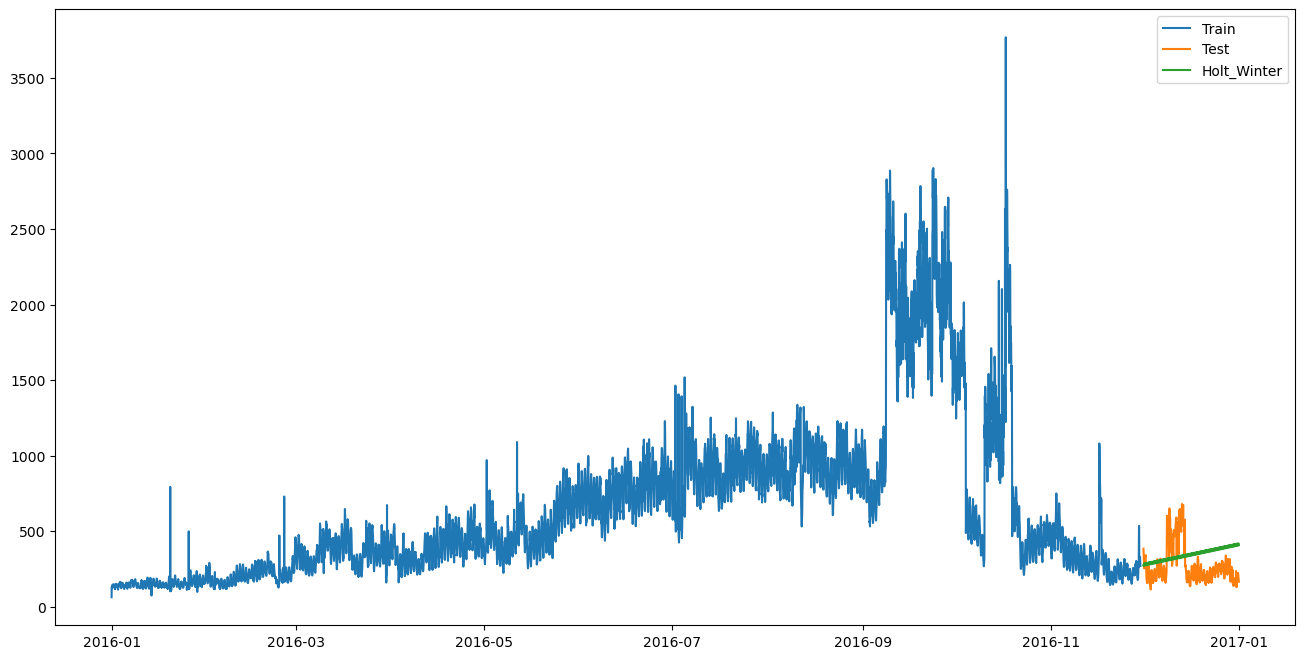

In [15]:

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['yield']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [16]:
rmse = sqrt(mean_squared_error(test['yield'], y_hat_avg.Holt_Winter))
print(rmse)

156.75709148690913


In [17]:
 y_hat_avg.Holt_Winter

date
2016-12-01 00:00:00    272.718588
2016-12-01 01:00:00    270.661332
2016-12-01 02:00:00    274.161822
2016-12-01 03:00:00    284.985486
2016-12-01 04:00:00    281.172753
                          ...    
2016-12-31 19:00:00    419.483749
2016-12-31 20:00:00    414.998940
2016-12-31 21:00:00    414.621476
2016-12-31 22:00:00    414.243785
2016-12-31 23:00:00    407.509017
Freq: H, Name: Holt_Winter, Length: 744, dtype: float64

The rolling average for our model is 19.988482627808388. This prediction seems to be very consistent in hitting the average of the future sales. This naive model definitely looks like a solid model, however, it is not the best one.so we are considering moving average as a best model

**TEST DATA**

In [18]:
#reading the test data
ing_x_test= pd.read_csv('/kaggle/input/ing-x-data/ing_x_test.csv')

In [19]:
#checking the value counts of ing_x_test
ing_x_test['farm_id'].value_counts()

fid_68761     35040
fid_63700     35016
fid_73431     17519
fid_122174    17518
fid_53126     17518
              ...  
fid_42338      8246
fid_39121      8246
fid_65870      8246
fid_55346      8246
fid_117010     8246
Name: farm_id, Length: 496, dtype: int64

In [20]:
#checking the value counts of ing_x
ing_x['farm_id'].value_counts()

fid_63700     32246
fid_68761     30778
fid_122174    17566
fid_53126     17566
fid_73431     17564
              ...  
fid_87168      5147
fid_88637      4980
fid_69851      4898
fid_49218      4220
fid_111517     1079
Name: farm_id, Length: 496, dtype: int64

as both the farm_id unique values length is same going further for forcasting

**PREPROCESSING ing_x_TEST DATA**

In [21]:
ing_x_test['date'] = pd.to_datetime(ing_x_test['date'])

In [22]:
ing_x_test = ing_x_test.set_index(ing_x_test['date'])
ing_x_test = ing_x_test.sort_index()

Text(0.5, 1.0, 'Moving Average Forecast')

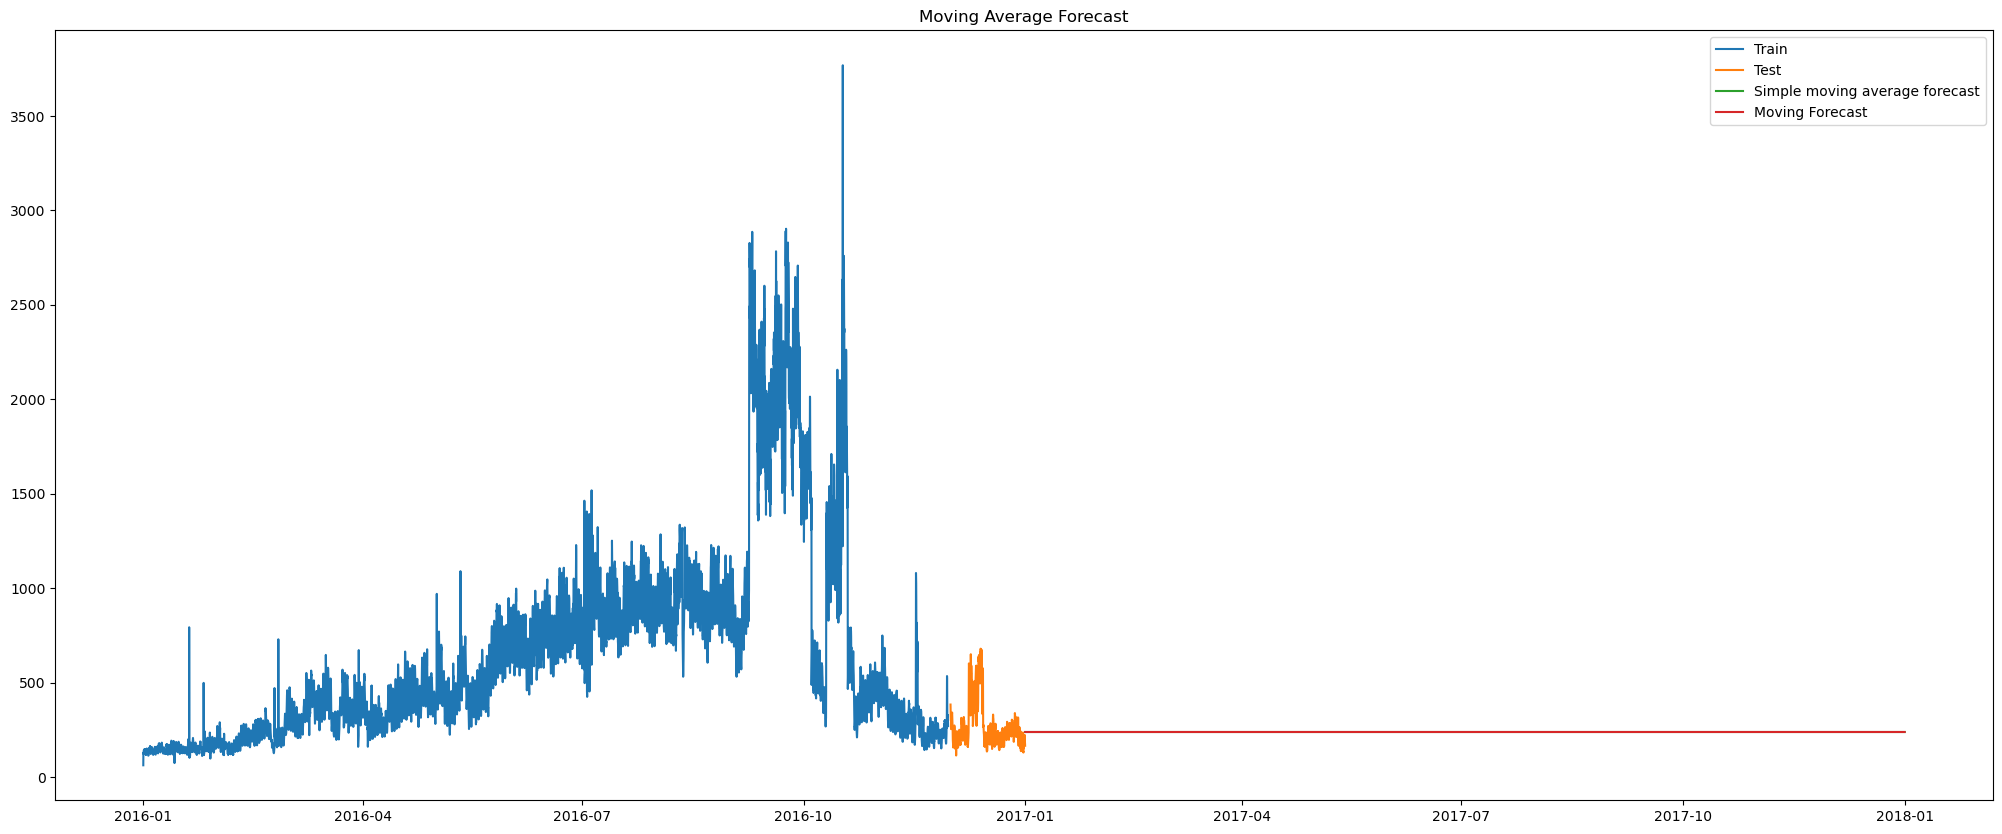

In [23]:
y_hat_avg_moving_pred = ing_x_test.copy()
y_hat_avg_moving_pred['moving_avg_forcast'] = train['yield'].rolling(200).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg_moving_pred['moving_avg_forcast'], label='Simple moving average forecast')
plt.plot(y_hat_avg_moving_pred['moving_avg_forcast'], label='Moving Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [24]:
y_hat_avg_moving_pred

,date,farm_id,ingredient_type,id,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,moving_avg_forcast
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_33785,ing_x,8,11248.1380,17.8,100.0,11.7,1021.5,3.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,238.856913
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_45809,ing_x,3349244,901.4378,16.1,310.0,9.4,1010.5,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.856913
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_60360,ing_x,3349248,9555.6310,16.1,310.0,9.4,1010.5,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.856913
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_99921,ing_x,3349250,15232.2830,16.1,310.0,9.4,1010.5,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.856913
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_44226,ing_x,3349253,13293.7690,16.1,310.0,9.4,1010.5,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.856913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_123014,ing_x,5880627,17957.5920,20.6,0.0,-8.3,1016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.856913
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_73057,ing_x,5880625,3428.4924,20.6,0.0,-8.3,1016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.856913
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_84046,ing_x,5880623,9262.4290,20.6,0.0,-8.3,1016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.856913


In [25]:
predictions = y_hat_avg_moving_pred[['date','farm_id','moving_avg_forcast']]

In [26]:
predictions

,date,farm_id,moving_avg_forcast
date,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_33785,238.856913
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_45809,238.856913
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_60360,238.856913
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_99921,238.856913
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_44226,238.856913
...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_123014,238.856913
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_73057,238.856913
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_84046,238.856913


In [27]:
predictions_ing_x = pd.DataFrame(predictions)

In [28]:
predictions_ing_x.to_csv('predictions_ing_x.csv', index=False)

In [29]:
# convert the data with respect to the month
predictions_ing_x['date'] = pd.to_datetime(predictions_ing_x['date'])
predictions_ing_x['month'] = predictions_ing_x['date'].dt.month
monthly_data_predictions_ing_x= predictions_ing_x.groupby('month').agg({'moving_avg_forcast': 'sum'})

# print the monthly data
print(monthly_data_predictions_ing_x)

       moving_avg_forcast
month                    
1            8.963536e+07
2            8.110124e+07
3            8.950255e+07
4            8.685339e+07
5            8.989165e+07
6            8.597989e+07
7            8.999364e+07
8            8.992485e+07
9            8.699336e+07
10           8.999412e+07
11           8.714694e+07
12           8.741924e+07


In [30]:
monthly_data_predictions_ing_x

,moving_avg_forcast
month,
1,8.963536e+07
2,8.110124e+07
3,8.950255e+07
4,8.685339e+07
5,8.989165e+07
6,8.597989e+07
7,8.999364e+07
8,8.992485e+07
9,8.699336e+07


In [31]:
# Convert the column to float
monthly_data_predictions_ing_x['moving_avg_forcast'] = monthly_data_predictions_ing_x['moving_avg_forcast'].astype(int)

In [32]:
monthly_data_predictions_ing_x.reset_index()

,month,moving_avg_forcast
0,1,89635356
1,2,81101237
2,3,89502551
3,4,86853389
4,5,89891649
5,6,85979889
6,7,89993641
7,8,89924850
8,9,86993359
9,10,89994119
